In [95]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt

from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [96]:
#Loading dataset from the dataset via load_dataset defined in lr_utils
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()
"""
Terminology: 
m -> number of examples
nx -> height = widith of the image
c  -> number of channels    
"""

m_train = train_x_orig.shape[0]
nx_train = train_x_orig.shape[1]
c_train = train_x_orig.shape[3]

m_test = test_x_orig.shape[0]
nx_test = test_x_orig.shape[1]
c_test = test_x_orig.shape[3]

In [97]:
#Step-01: We shall now flattern the train_set_x & test_set_x to a n*m matrix
train_x = train_x_orig.reshape(m_train,nx_train*nx_train*c_train).T
test_x = test_x_orig.reshape(m_test,nx_test*nx_test*c_test).T

In [98]:
#step-02: Normaize the input i.e. train_x & test_x
train_x = train_x / 255
test_x = test_x / 255

In [106]:
#step-03: Random initialization of parameters W
def randomInitialization(nx):
    w = np.random.rand(nx,1)*0.01
    #w = np.zeros((nx,1))
    b = 0
    return w,b

In [107]:
#step-04: Prepare sigmoid function for computing Activation Function
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [108]:
#step-05: Forward Propogation & Backward Propogation
def Propogation(X, y, w, b):
    
    #Forward Propogation
    
    """
    Terminology: 
       z -> Linear function
       A -> Activation function
       J -> Cost function
    """
    m = X.shape[1]
    z = np.dot(w.T,X)+b
    A = sigmoid(z)
    J = (-1/m)*np.sum(y*np.log(A)+ (1-y)*np.log(1-A))
    
    #Backward Propogation
    
    """
    Terminology: 
       dw -> Gradient or slope of 'w'
       db -> Gradient or slope of 'b'
    """
    
    dw = (1/m)*np.dot(X,(A-y).T)
    db = (1/m)*np.sum(A-y)
    
    gradients = {
        "dw":dw,
        "db":db
    }
    return gradients, J


In [109]:
#step-06: Now we need to find the perfect fit of 'w' & 'b', 
def perfectFit(X, y, w, b, alpha, noIterations):
    """
    Terminology: 
       alpha -> Learning Rate
       noIterations -> Number of Iterations
       costs[] -> lists of costs computed; In the end we can plot the graph of costs vs no. of iterations
    """ 
    
    costs = []
    
    for i in range(noIterations):
        
        gradients, J = Propogation(X, y, w, b)
        dw = gradients['dw']
        db = gradients['db']
        
        w = w - alpha*dw
        b = b - alpha*db
        
        if i % 100 == 0:
            costs.append(J)
        
    parameters = {
        "w" : w,
        "b" : b
    }
    
    gradients = {
        "dw" : dw,
        "db" : db
    }
    return parameters, gradients, costs
        
        

In [110]:
#step-07 Testing the data againsts the calculated params
def testData(X, w, b):
    w = w.reshape(X.shape[0], 1)
    z = np.dot(w.T,X)+b
    A = sigmoid(z)
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))    
    #Now that we have probabilities in 'A', we shall predict y_prediction=0 if A <= 0.5(threshold)
    for i in range(A.shape[1]):
        Y_prediction[0,i] = 0 if A[0,i] <= 0.5 else 1
    
    return Y_prediction

    

In [120]:
#step-08 Main function with integrates all the above steps in sequence
def mainIntegration(train_x, train_y, test_x, test_y, m_train):
    alpha=0.05
    noIterations=2000
    
    #random initialization
    w, b = randomInitialization(train_x.shape[0])
    
    #F.W.D and B.W.D propogation for cost, dw & db & Optimizing dw & db
    parameters, gradients, costs = perfectFit(train_x, train_y, w, b, alpha, noIterations)
    
    w = parameters["w"]
    b = parameters["b"]
    
    #Predicting the output for test data
    y_prediction_test = testData(test_x, w, b)
    y_prediction_train = testData(train_x, w, b)
    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - test_y)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": y_prediction_test, 
         "Y_prediction_train" : y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": noIterations}
    
    return d

In [121]:
d = mainIntegration(train_x, train_y, test_x, test_y, m_train)

test accuracy: 68.0 %


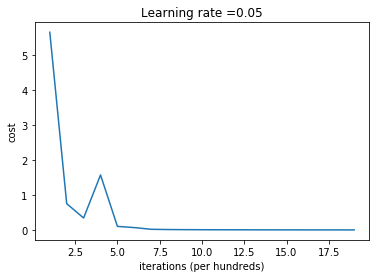

In [122]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()